In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from math import sqrt

def get_means(df, k):
  idx_array = []
  for i in range(k):
    idx_array.append(randint(0, len(df)-1))
  means = []
  for i in range(k):
    means.append(list(df.loc[idx_array[i],:]))
  return means

def build_clusters(df, means):
  clusters = dict()  
  for i in range(len(df)):
    cost = 1000
    key = 0
    point_x, point_y = df.loc[i,'x'], df.loc[i,'y']
    # if [point_x, point_y] not in means:
    for mean in means:
      mean_x, mean_y = mean[0], mean[1]
      cost_new = sqrt((point_x - mean_x)**2 + (point_y - mean_y)**2)
      if cost_new<cost:
        cost = cost_new
        key = means.index(mean)
    if key in clusters:
      clusters[key].append([point_x, point_y])
    else:
      clusters[key] = [[point_x, point_y]]
  return clusters

def get_new_means(clusters, means):
  new_means = []
  flag = False

  for key in clusters:
    points = clusters[key]
    x,y=0,0
    for point in points:
      x+=point[0]
      y+=point[1]
    x/=len(points)
    y/=len(points)
    new_means.append([x,y])
    if new_means!=means:
      flag = True
    else:
      flag = False

  return new_means, flag

def showData(clusters):
  dfs = []
  colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
  i=0
  for key in clusters:
    cluster = clusters[key]
    df2 = pd.DataFrame(cluster, columns=['x','y'])
    dfs.append(df2)
  
  for df2 in dfs:
    i+=1
    x, y = df2['x'], df2['y']
    plt.title('Clusters')
    plt.scatter(x,y, color=colors[i])
    
  plt.show()

In [2]:
#data visualization

df = pd.read_csv('data.csv')
print(df.head())

    x   y
0   2   3
1   4   6
2  13  15
3  12   2
4   2  12


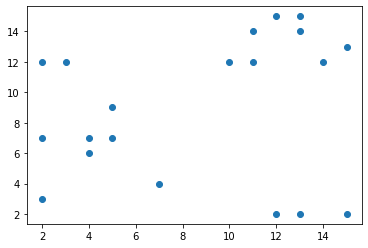

In [3]:
x = df['x']
y = df['y']
plt.scatter(x,y)
plt.show()

In [4]:
k = 3
no_iters = 3

means = get_means(df,k)
# means = [[3.375, 7.875], [11.75, 2.5], [12.375, 13.375]] 
clusters = build_clusters(df, means)
print(clusters)

{1: [[2, 3], [2, 12], [2, 7]], 2: [[4, 6], [4, 7], [5, 9], [3, 12], [7, 4], [5, 7]], 0: [[13, 15], [12, 2], [11, 12], [13, 14], [13, 2], [14, 12], [10, 12], [11, 14], [15, 13], [15, 2], [12, 15]]}


Cluster 0

 {1: [[2, 3], [2, 12], [2, 7]], 2: [[4, 6], [4, 7], [5, 9], [3, 12], [7, 4], [5, 7]], 0: [[13, 15], [12, 2], [11, 12], [13, 14], [13, 2], [14, 12], [10, 12], [11, 14], [15, 13], [15, 2], [12, 15]]} 



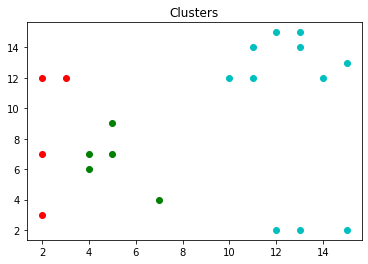

Cluster 1

 {0: [[2, 3], [2, 12], [2, 7], [3, 12]], 1: [[4, 6], [4, 7], [5, 9], [7, 4], [5, 7]], 2: [[13, 15], [12, 2], [11, 12], [13, 14], [13, 2], [14, 12], [10, 12], [11, 14], [15, 13], [15, 2], [12, 15]]} 



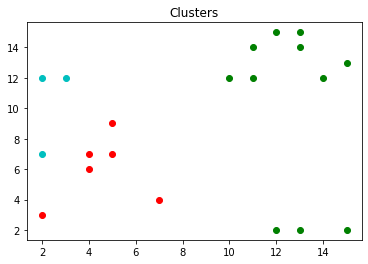

Cluster 2

 {1: [[2, 3], [4, 6], [4, 7], [5, 9], [7, 4], [5, 7]], 2: [[13, 15], [12, 2], [11, 12], [13, 14], [13, 2], [14, 12], [10, 12], [11, 14], [15, 13], [15, 2], [12, 15]], 0: [[2, 12], [2, 7], [3, 12]]} 



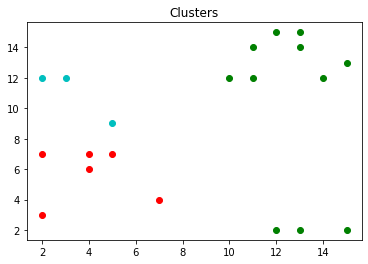

In [5]:
for i in range(no_iters):
  print('Cluster %d' % (i))
  print('\n',clusters,'\n')
  new_means, flag = get_new_means(clusters, means)
  if flag==True and i<no_iters:
    means = new_means
    clusters = build_clusters(df, new_means)
    showData(clusters)
  elif flag==False:
    print('No new means generated')
    break